In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage.transform import pyramid_gaussian
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# import matplotlib.pyplot as plt
from inspect import signature

# print(glob.glob("../ILIYAN Master Thesis/Dataset/*"))

%matplotlib inline
%precision 2

'%.2f'

In [2]:
df = pd.read_csv('dataset/features_norm.csv', index_col=0)
df_t1 = pd.read_csv('dataset/fs/df_top_1.csv', index_col=0)
df_t1t2 = pd.read_csv('dataset/fs/df_top_1_and_2.csv', index_col=0)
df_rf = pd.read_csv('dataset/fs/df_embeded_rf_feature.csv', index_col=0)

In [3]:
def draw_confusionmatrix(y_test, y_hat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(y_test, y_hat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(y_test, y_hat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")
    print('\n')
    print(classification_report(y_test, y_hat))
    print('\n')

In [4]:
def gen_train_and_test(df, test_size=0.20, random_state=42):
    X = df.loc[:, df.columns != 'Class']
    y = df.Class
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [5]:
def split_train_and_test(X, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)    
    return X_train, X_test, y_train, y_test

In [6]:
def start_model(df, model):
    X_train, X_test, y_train, y_test = gen_train_and_test(df)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    draw_confusionmatrix(y_test, y_hat)

In [7]:
def start_grid_cv(df, cv=5, n_jobs=-1):
    param_grid = {
                  'kernel':('linear', 'rbf'),
                  'C':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 10),
                  'gamma': (0.001, 0.01, 0.1, 1,2,3,'auto'),
                  'decision_function_shape':('ovo','ovr'),
                  'shrinking':(True,False)
                 }
    X_train, X_test, y_train, y_test = gen_train_and_test(df)
    clf = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=n_jobs)
    clf.fit(X_train, y_train)
    
    print("avg accuracy:"+str(np.average(cross_val_score(clf, X_train, y_train, scoring='accuracy'))))
    print("avg f1:"+str(np.average(cross_val_score(clf, X_train, y_train, scoring='f1'))))
    
    best_params = clf.best_params_
    print(best_params)
    
    return best_params

### Using "df"

In [8]:
params = start_grid_cv(df)

avg accuracy:0.498168498168
avg f1:0.618614718615
{'C': 0.001, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'linear', 'shrinking': True}


In [9]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         4
        1.0       0.60      1.00      0.75         6

avg / total       0.36      0.60      0.45        10





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


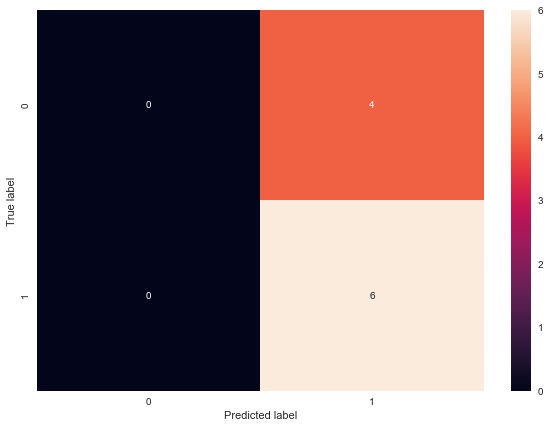

In [10]:
start_model(df, model=svm_gscv)

In [11]:
params = start_grid_cv(df, cv=10)

avg accuracy:0.478021978022
avg f1:0.642105263158
{'C': 0.001, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'linear', 'shrinking': True}


In [12]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         4
        1.0       0.60      1.00      0.75         6

avg / total       0.36      0.60      0.45        10





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


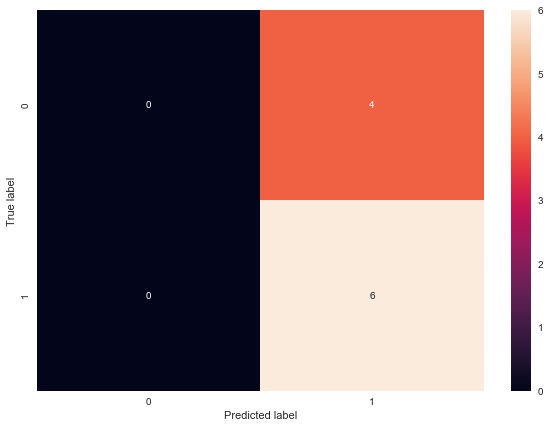

In [13]:
start_model(df, model=svm_gscv)

### Using "df_rf"

In [14]:
params = start_grid_cv(df_rf)

avg accuracy:0.450549450549
avg f1:0.561375661376
{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 3, 'kernel': 'rbf', 'shrinking': True}


In [15]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.50      0.25      0.33         4
        1.0       0.62      0.83      0.71         6

avg / total       0.57      0.60      0.56        10





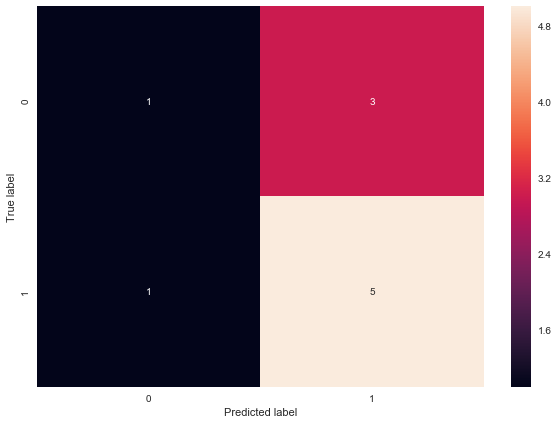

In [16]:
start_model(df_rf, model=svm_gscv)

In [17]:
params = start_grid_cv(df_rf, cv=10)

avg accuracy:0.501831501832
avg f1:0.641666666667
{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf', 'shrinking': True}


In [18]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.8


             precision    recall  f1-score   support

        0.0       0.75      0.75      0.75         4
        1.0       0.83      0.83      0.83         6

avg / total       0.80      0.80      0.80        10





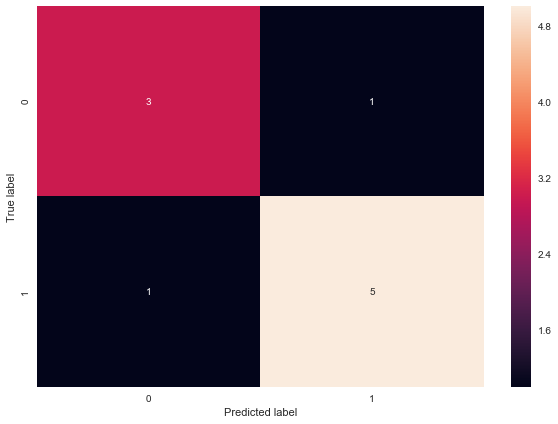

In [19]:
start_model(df_rf, model=svm_gscv)

### Using "df_t1"

In [20]:
params = start_grid_cv(df_t1)

avg accuracy:0.525641025641
avg f1:0.663888888889
{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 2, 'kernel': 'rbf', 'shrinking': True}


In [21]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.50      0.25      0.33         4
        1.0       0.62      0.83      0.71         6

avg / total       0.57      0.60      0.56        10





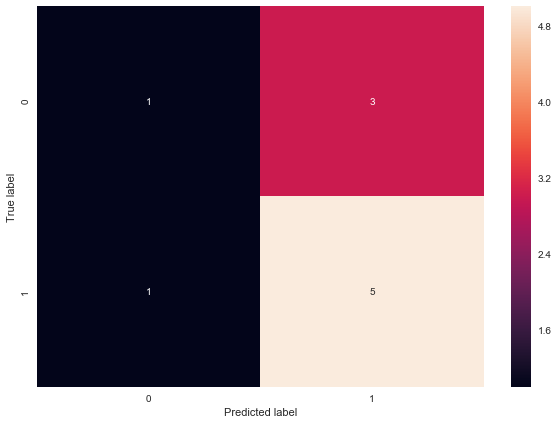

In [22]:
start_model(df_t1, model=svm_gscv)

In [23]:
params = start_grid_cv(df_t1, cv=10)

avg accuracy:0.549450549451
avg f1:0.646031746032
{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 2, 'kernel': 'rbf', 'shrinking': True}


In [24]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.50      0.25      0.33         4
        1.0       0.62      0.83      0.71         6

avg / total       0.57      0.60      0.56        10





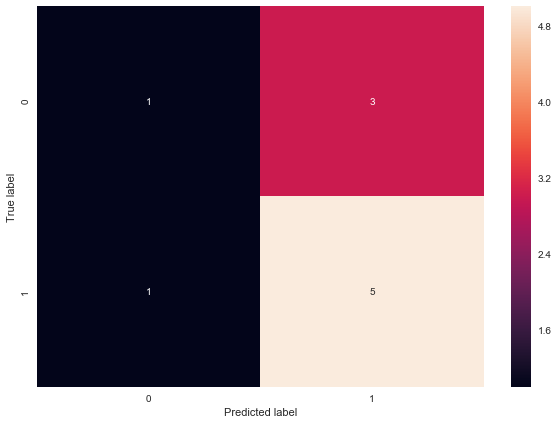

In [25]:
start_model(df_t1, model=svm_gscv)

### Using "df_t1t2"

In [26]:
params = start_grid_cv(df_t1t2)

avg accuracy:0.549450549451
avg f1:0.709090909091
{'C': 0.75, 'decision_function_shape': 'ovo', 'gamma': 3, 'kernel': 'rbf', 'shrinking': True}


In [27]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.8


             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67         4
        1.0       0.75      1.00      0.86         6

avg / total       0.85      0.80      0.78        10





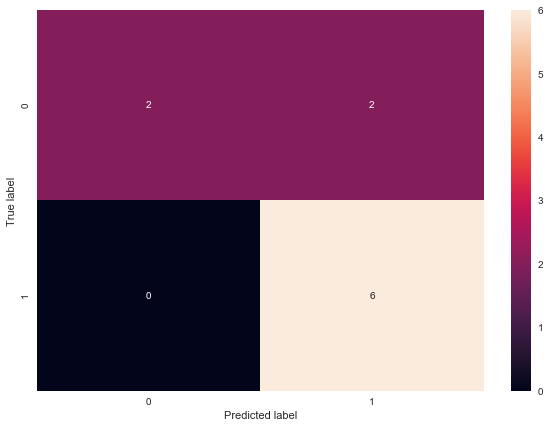

In [28]:
start_model(df_t1t2, model=svm_gscv)

In [29]:
params = start_grid_cv(df_t1t2, cv=10)

avg accuracy:0.575091575092
avg f1:0.680885780886
{'C': 0.75, 'decision_function_shape': 'ovo', 'gamma': 3, 'kernel': 'rbf', 'shrinking': True}


In [30]:
svm_gscv=svm.SVC(kernel=params['kernel'], C=params['C'], decision_function_shape=params['decision_function_shape'], gamma=params['gamma'], shrinking=params['shrinking'])

Sum Axis-1 as Classification accuracy: 0.8


             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67         4
        1.0       0.75      1.00      0.86         6

avg / total       0.85      0.80      0.78        10





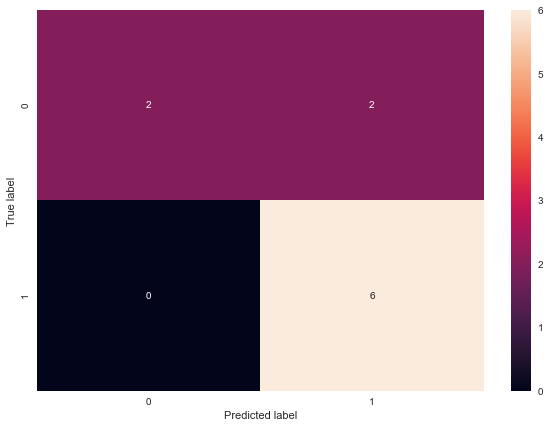

In [31]:
start_model(df_t1t2, model=svm_gscv)